# Example 3.1: Fourier series

In [2]:
import numpy as np
from matplotlib import pyplot as plt

## Define waveform
We start by defining a square waveform. We will integrate the waveform over one period. We have, however, plotted several periods to illustrate the behaviour of the Fourier series. The blue line in the figure shows four periods of the time series that we will approximate, while the brown line shows the line that we will integrate (one period)

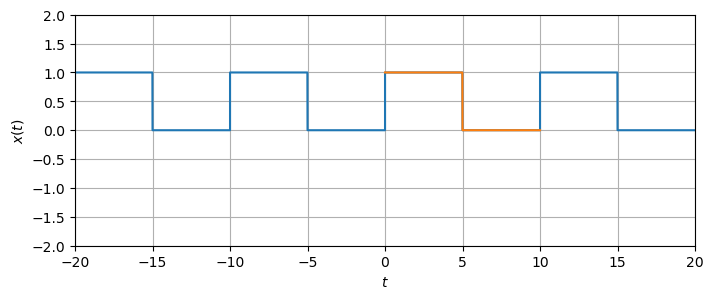

In [3]:
dt = 0.01 # Time step
t = np.arange(0,10.01,dt) # Time vector
x = np.zeros(t.shape) # Initialize the x array
x[t<5] = 1.0 # Set the value of x to one for t<5

# Plot waveform
plt.figure(figsize=(8, 3))
plt.plot(np.hstack((t-20.0,t-10.0, t, t+10.0)),np.hstack((x,x,x,x))) # Plot four periods
plt.plot(t,x) # Plot one period
plt.ylim(-2, 2)
plt.xlim(-20,20)
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.grid()


## Alternative 1: Obtaining Fourier coefficients expressed by sin() and cos() by the trapezoidal rule
Fourier series expressed in terms of sinus and cosine functions are defined by

$$ x(t) = a_{0} + \sum_{k=1}^{\infty} \left( a_k \cos\left(\frac{2\pi k}{T}t \right) + b_k \sin\left(\frac{2\pi k}{T}t \right)\right)  $$

Here $a_0$, $a_k$ and $b_k$ are Fourier coefficients given by

$$a_0 = \frac{1}{T} \int_{0}^{T}x(t) \:\text{d}t$$

$$a_k = \frac{1}{T} \int_{0}^{T}x(t)\cos\left(\frac{2\pi k}{T}t \right)\:\text{d}t$$

$$b_k = \frac{1}{T} \int_{0}^{T}x(t)\sin\left(\frac{2\pi k}{T}t \right)\:\text{d}t$$

The integrals above can be solved analytically and by numerical integration. In this example, we will consider different methods for numerical integration to obtain the coefficients, and we use the trapezoidal rule in this section.

0.49950000000000006


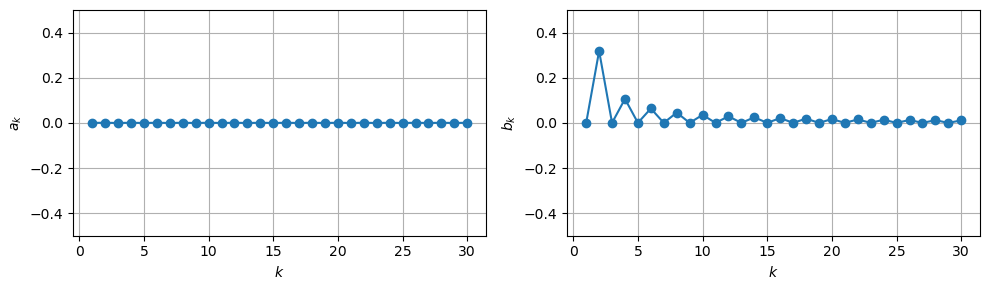

In [10]:
nterms = 30 # Number of Fourier coefficients in the sum

T = np.max(t) # The period of the waveform

a0 = 1/T*np.trapezoid(x,t) # Mean value
ak = np.zeros((nterms)) 
bk = np.zeros((nterms))
for k in np.arange(1,nterms,1): # Integrate for all terms
    ak[k] = 1/T*np.trapezoid(x*np.cos(2.0*np.pi*k*t/T),t)
    bk[k] = 1/T*np.trapezoid(x*np.sin(2.0*np.pi*k*t/T),t)

# Plot Fourier coeffecients
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.plot(np.arange(1,nterms+1),ak,marker='o')
plt.ylim(-0.5, 0.5)
plt.grid()
plt.xlabel('$k$')
plt.ylabel('$a_k$')

plt.subplot(1, 2, 2)
plt.plot(np.arange(1,nterms+1),bk,marker='o')
plt.ylim(-0.5, 0.5)
plt.grid()
plt.xlabel('$k$')
plt.ylabel('$b_k$')

plt.tight_layout()

print(a0)

The mean value is $a_0=0.5$, while the figures above show that the 

- The $a_k$ coefficients are all zero
- Every second $b_k$ coefficient is zero
- The non-zero terms become smaller as $k$ increases.

It is interesting to plot the Fourier approximation and see how its accuracy depends on the number of terms used in the approximation.

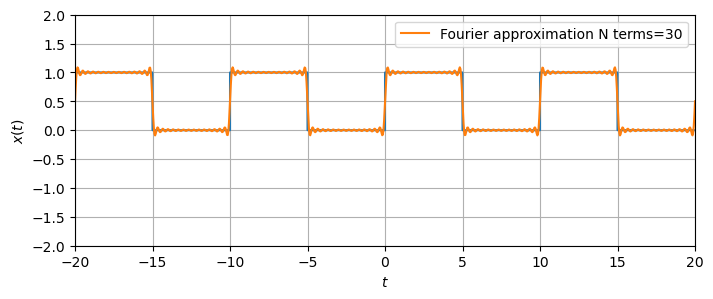

In [17]:
# Plot Fourier series approximation
tp  = np.linspace(-20,20,1000)
x_Fourier = np.ones(tp.shape[0])*a0

for k in np.arange(1,nterms):
    x_Fourier = x_Fourier + 2.0*(ak[k]*np.cos(2.0*np.pi*k*tp/T) + bk[k]*np.sin(2.0*np.pi*k*tp/T))

plt.figure(figsize=(8,3))
plt.plot(np.hstack((t-20.0,t-10.0, t, t+10.0)),np.hstack((x,x,x,x))); # Plot four periods
plt.plot(tp,x_Fourier, label=('Fourier approximation N terms='+str(nterms)))
plt.ylim(-2, 2)
plt.xlim(-20,20)
plt.grid()
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.legend()
    

The figure above shows that the Fourier approximation fits the waveform reasonably well and that the approximation gets better as more terms are added to the approximation. Try to change the number of terms yourself and observe how the approximation improves. Also, note the high-frequency oscillations observed in the corners of the Fourier approximation. This is called the Gibbs phenomenon. Note that it is impossible to get rid of these oscillations and that a Fourier series will always slightly overshoot when approximating step changes.

## Alternative 2: Trapezoidal rule, complex Fourier series
This approach is the same as the example above. Still, now we use the complex format of the Fourier series, which is essentially only rewriting of the formula introducing Euler's formula $e^{i \omega t} = \cos(\omega t) + i \sin(\omega t)$. We define 

$$X_k = a_k -ib_k $$

$$ e^{-i\left(\frac{2\pi kt}{T} \right)} =\cos\left(\frac{2\pi k}{T}t \right) - i \sin\left(\frac{2\pi k}{T}t \right)  $$


$$X_k = \frac{1}{T} \int_{0}^{T}x(t) \left( \cos\left(\frac{2\pi k}{T}t \right) - i \sin\left(\frac{2\pi k}{T}t \right)  \right)\:\text{d}t$$

$$X_k = \frac{1}{T} \int_{0}^{T} x(t) e^{-i\left(\frac{2\pi kt}{T} \right)}\:\text{d}t$$

Note that the mean value is obtained when $k=0$ and that both negative and positive $k$ values are necessary to cancel the imaginary part of the approximation. We will now calculate the Fourier coefficients using the trapezoidal rule.

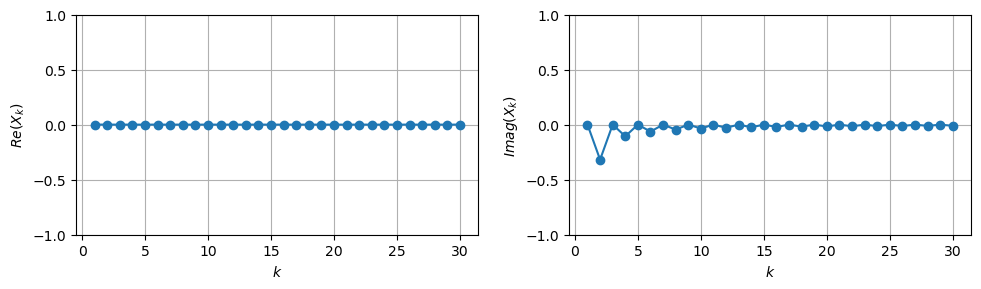

In [18]:

Xk = np.zeros(nterms,dtype=complex)
for k in np.arange(1,nterms,1):
    Xk[k] = 1/T*np.trapezoid(x*np.exp(-1j*2*np.pi/T*k*t),t)

# Plot Fourier coeffecients
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.plot(np.arange(1,nterms+1),np.real(Xk),marker='o')
#plt.xlim(0,10)
plt.ylim(-1, 1)
plt.grid()
plt.xlabel('$k$')
plt.ylabel('$Re(X_k)$')

plt.subplot(1, 2, 2)
plt.plot(np.arange(1,nterms+1),np.imag(Xk),marker='o')
#plt.xlim(0,10)
plt.ylim(-1, 1)
plt.grid()
plt.xlabel('$k$')
plt.ylabel('$Imag(X_k)$')

plt.tight_layout()

The figures above and the defined relation $X_k=a_k-ib_k$ show that we get the same Fourier coefficients as the case above and that this is only a rewriting of the Fourier series.

## Alternative 3: Left rectangular rule, complex Fourier series

The continuous Fourier transform is defined as:

$$X_k = \frac{1}{T} \int_{0}^{T} x(t) e^{-i\left(\frac{2\pi kt}{T} \right)}\:\text{d}t$$

We will now consider a discrete alternative. The function $x(t)$ is assumed constant and equal to the left side of the rectangle when integrated by the left rectangular rule. This is what is typically implemented in software for the discrete Fourier transform. The integral using the left rectangular rule can be expressed as:
 
 $$X_k = \frac{1}{T} \sum_{n=0}^{N-1} x_n e^{-i\left(\frac{2\pi k n\Delta t}{T} \right)} \Delta t$$
 
  $$X_k = \frac{1}{N} \sum_{n=0}^{N-1} x_n e^{-i\left(\frac{2\pi k n}{N} \right)}$$
 

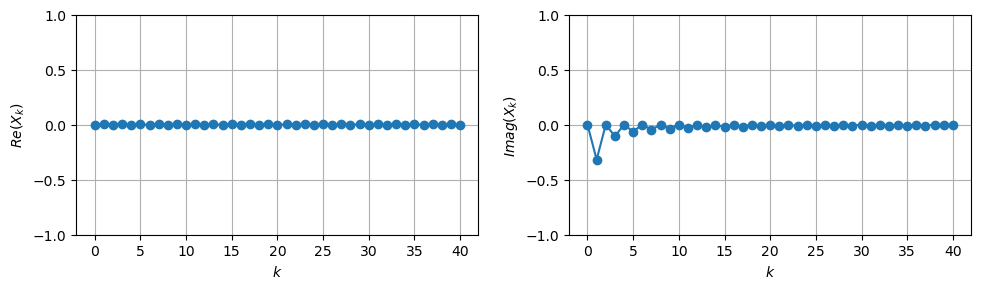

In [7]:
N = t.shape[0] # Length of the data series

Xk = np.zeros(nterms+1,dtype=complex)
for k in np.arange(1,nterms+1,1):
    Xk[k] = 1/N*np.matmul(x,np.exp(-1j*2*np.pi/N*k*np.arange(N)))

# Plot Fourier coeffecients
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.plot(np.arange(0,nterms+1),np.real(Xk),marker='o')
#plt.xlim(0,10)
plt.ylim(-1,1)
plt.grid()
plt.xlabel('$k$')
plt.ylabel('$Re(X_k)$')

plt.subplot(1, 2, 2)
plt.plot(np.arange(0,nterms+1),np.imag(Xk),marker='o')
#plt.xlim(0,10)
plt.ylim(-1,1)
plt.grid()
plt.xlabel('$k$')
plt.ylabel('$Imag(X_k)$')

plt.tight_layout()

## Alternative 4: The fast Fourier transform
The discrete Fourier transform can be implemented in a clever time-saving way. This implementation is called the fast Fourier transform and is implemented in many software and is available in the NumPy package. The Fourier coefficients can be obtained using the FFT as shown below.



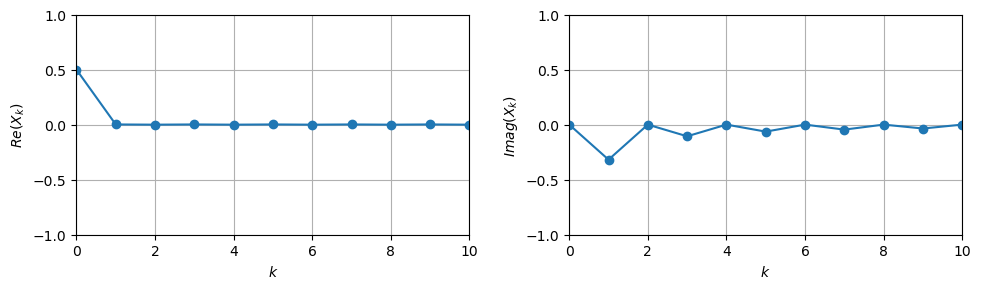

In [8]:
N = t.shape[0] # The length of the data series
Xk = np.fft.fft(x)/N

# Plot Fourier coeffecients
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.plot(np.arange(0,N),np.real(Xk),marker='o')
plt.xlim(0,10)
plt.ylim(-1,1)
plt.grid()
plt.xlabel('$k$')
plt.ylabel('$Re(X_k)$')

plt.subplot(1, 2, 2)
plt.plot(np.arange(0,N),np.imag(Xk),marker='o')
plt.xlim(0,10)
plt.ylim(-1,1)
plt.grid()
plt.xlabel('$k$')
plt.ylabel('$Imag(X_k)$')

plt.tight_layout()